In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#####Load the dataset

In [2]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
df = pd.concat([train_data, test_data], axis = 0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


#####Delete the longitute and latitude column

In [5]:
# try:
#   df.drop(['longitude', 'latitude'], axis = 1)
# except Exception as e:
#   print(e.with_traceback)
# else:
#   print("longitude & latitude column is deleted. !")

In [6]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


#####Do the scaling so that we can make their distribution in a same shape

In [7]:
minmax_scaler = MinMaxScaler()
data_scaling = minmax_scaler.fit_transform(df)
df = pd.DataFrame(data_scaling)
df.head()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


#####Split the dataset into train and testing

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("The shape of X_train is # {} ".format(X_train.shape),'\n')
print("The shape of X_test  is # {} ".format(X_test .shape),'\n')
print("The shape of y_train is # {} ".format(y_train.shape),'\n')
print("The shape of y_test  is # {} ".format(y_test.shape))

The shape of X_train is # (14000, 8)  

The shape of X_test  is # (6000, 8)  

The shape of y_train is # (14000,)  

The shape of y_test  is # (6000,) 


In [9]:
import torch
X_train = torch.tensor(data = X_train, dtype = torch.float32)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)

######Initialize the DataLoader

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

BATCH_SIZE = 64

train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

print("The batch size of train  # {} ".format(train_loader.batch_size))
print("The batch size of test   # {} ".format(test_loader.batch_size))

The batch size of train  # 64 
The batch size of test   # 64 


In [11]:
train_data, train_label = next(iter(train_loader))
test_data, test_label   = next(iter(test_loader))

print("Shape of singular batch size of train # {} and labels # {} ".format(train_data.shape, train_label.shape))
print("Shape of singular batch size of test  # {} and labels # {} ".format(test_data.shape, test_label.shape))

Shape of singular batch size of train # torch.Size([64, 8]) and labels # torch.Size([64]) 
Shape of singular batch size of test  # torch.Size([64, 8]) and labels # torch.Size([64]) 


#####Model Building

In [12]:
"""
Create a class named HousePrediction that would take TWO parameter named
1. input_dimension  = 8
2. output_dimension = 1
"""
class HousePrediction(nn.Module):
  """Create a constructor"""
  def __init__(self, input_dimension = None, output_dimension = None):
    """Call the super() for inherit the parent class of PyTorch(nn.Module)"""
    super().__init__()

    """
    Create the First hidden layer & activation
    1. in_features  = input_dimension
    2. out_features = 128
    """
    self.hiddenLayer1 = nn.Linear(in_features = input_dimension, out_features = 24)
    self.activation1  = nn.ReLU()

    """
    Create the second Hidden Layer & activation function
    1. in_features  = 128
    2. out_features = 64
    3. activation   = ReLU()
    """
    self.hiddenLayer2 = nn.Linear(in_features = 24, out_features = 12)
    self.activation2  = nn.ReLU()

    """
    Create the third hidden layer & activation function
    1. in_features  = 64
    2. out_features = 32
    3. Activation   = ReLU()
    # """
    self.hiddenLayer3 = nn.Linear(in_features = 12, out_features = 6)
    self.activation3  = nn.ReLU()

    """
    Use the dropout layer
    """
    self.dropout = nn.Dropout(p = 0.6)

    """
    Create the output layer & activation
    1. in_features = 32,
    2. out_features = output_dimension
    """
    self.outputLayer = nn.Linear(in_features = 6, out_features = output_dimension)
    self.outputActivation = None

  def forward(self, x):
    """For First Hidden Layer"""
    x = self.activation1(self.hiddenLayer1(x))

    """For Second Hidden Layer"""
    x = self.activation2(self.hiddenLayer2(x))

    """For the Dropout layer"""
    x = self.dropout(x)

    """For third Hidden Layer"""
    x = self.activation3(self.hiddenLayer3(x))

    """For the Dropout layer"""
    x = self.dropout(x)

    """"For the output Layer"""
    x = self.outputLayer(x)

    return x

In [13]:
### Call the HousePrediction model
model = HousePrediction(input_dimension = X_train.shape[1], output_dimension = 1)
print(model.parameters)

<bound method Module.parameters of HousePrediction(
  (hiddenLayer1): Linear(in_features=8, out_features=24, bias=True)
  (activation1): ReLU()
  (hiddenLayer2): Linear(in_features=24, out_features=12, bias=True)
  (activation2): ReLU()
  (hiddenLayer3): Linear(in_features=12, out_features=6, bias=True)
  (activation3): ReLU()
  (dropout): Dropout(p=0.6, inplace=False)
  (outputLayer): Linear(in_features=6, out_features=1, bias=True)
)>


In [14]:
### Display the model
summary(model = model, input_size = X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 20000, 24]             216
              ReLU-2            [-1, 20000, 24]               0
            Linear-3            [-1, 20000, 12]             300
              ReLU-4            [-1, 20000, 12]               0
           Dropout-5            [-1, 20000, 12]               0
            Linear-6             [-1, 20000, 6]              78
              ReLU-7             [-1, 20000, 6]               0
           Dropout-8             [-1, 20000, 6]               0
            Linear-9             [-1, 20000, 1]               7
Total params: 601
Trainable params: 601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.61
Forward/backward pass size (MB): 15.72
Params size (MB): 0.00
Estimated Total Size (MB): 16.33
-------------------------------------------------

#####Initialize the loss & optimizer

In [15]:
LEARNING_RATE = 0.0001
loss_function = nn.MSELoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Do the training

In [16]:
"""Ïnitialize some of the variables"""
EPOCHS = 200
TRAIN_LOSS = []
VAL_LOSS = []
L2_LAMBDA = 0.001
model.train()

"""Run a loop with respect to the EPOCHS"""
for epoch in range(EPOCHS):
  """
  1. Extract the data(X_batch), label(y_batch) from train_loader. To do this run the loop.
  2. Initialize the empty list named loss_calculate
  """
  for (X_batch, y_batch) in train_loader:
    # Assuming you are loading the data and labels as numpy arrays
    X_batch = torch.tensor(X_batch, dtype=torch.float32)
    y_batch = torch.tensor(y_batch, dtype=torch.float32)

    """Pass this train dataset to the model and do the prediction"""
    train_prediction = model(X_batch)
    """Compute the train loss"""
    train_loss = loss_function(train_prediction, y_batch)

    """
    Use L2 regularization, formula: Loss + lambda * weight^2
    """

    l2_regularization = sum(torch.norm(param, 2) for param in model.parameters())
    train_loss = train_loss + L2_LAMBDA * l2_regularization

    """
    1. Initialize the Gradient of optimizer
    2. Do the backward() propagation of loss
    3. Do the step() for optimizer
    """
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

  """Store the train loss epoch wise"""
  TRAIN_LOSS.append(train_loss.item())

  """***************************************************************************************"""
  """***************************************************************************************"""
  """
  Do this all for the validation
  """
  model.eval()
  for (val_batch, val_label) in test_loader:
    val_batch = torch.tensor(val_batch, dtype=torch.float32)
    val_label = torch.tensor(val_label, dtype=torch.float32)
    """Pass the test dataset to the model and do the prediction"""
    test_prediction = model(val_batch)
    """Compute the test loss"""
    test_loss = loss_function(test_prediction, val_batch)

  """
  Store the test loss epoch wise
  """
  VAL_LOSS.append(test_loss.item())

  """***************************************************************************************"""
  """***************************************************************************************"""
  """
  Display:
  1. Train Loss
  2. Test Loss
  """
  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))
  print("{}/{} [===========================] loss: {} - val_loss: {} ".format(train_loader.batch_size,\
                                                                              train_loader.batch_size,\
                                                                              np.array(train_loss.item()).mean(),\
                                                                              np.array(test_loss.item()).mean())
  )

Epoch 1/200 
64/64 [===========================] loss: 0.2879297733306885 - val_loss: 0.11675939708948135 
Epoch 2/200 
64/64 [===========================] loss: 0.13578152656555176 - val_loss: 0.06232988461852074 
Epoch 3/200 
64/64 [===========================] loss: 0.06874440610408783 - val_loss: 0.06585341691970825 
Epoch 4/200 
64/64 [===========================] loss: 0.09595684707164764 - val_loss: 0.07492881268262863 
Epoch 5/200 
64/64 [===========================] loss: 0.053969237953424454 - val_loss: 0.07865238934755325 
Epoch 6/200 
64/64 [===========================] loss: 0.05793973430991173 - val_loss: 0.08468643575906754 
Epoch 7/200 
64/64 [===========================] loss: 0.07819129526615143 - val_loss: 0.0809878408908844 
Epoch 8/200 
64/64 [===========================] loss: 0.06902734190225601 - val_loss: 0.08014560490846634 
Epoch 9/200 
64/64 [===========================] loss: 0.06041054055094719 - val_loss: 0.08074070513248444 
Epoch 10/200 
64/64 [========

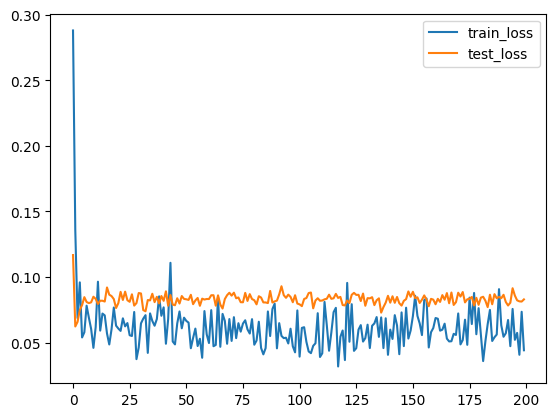

In [17]:
plt.plot(np.array(TRAIN_LOSS), label = 'train_loss')
plt.plot(np.array(VAL_LOSS), label = 'test_loss')
plt.legend()
plt.show()

In [18]:
with torch.no_grad():
  predicted = model(X_test)

  print("MSE # {}".format(mean_squared_error(predicted.numpy().ravel(), y_test)))
  print("MAE # {}".format(mean_absolute_error(predicted.numpy().ravel(), y_test)))

MSE # 0.05780041332912202
MAE # 0.1891888529548188
